# Настройка оформления графиков в matplotlib

На этом занятии оформим ранее полученные графики и добавим к ним новые виды

В первую очередь перенесите результат последнего занятия, на котором получены две кривые намагниченности на разных полях

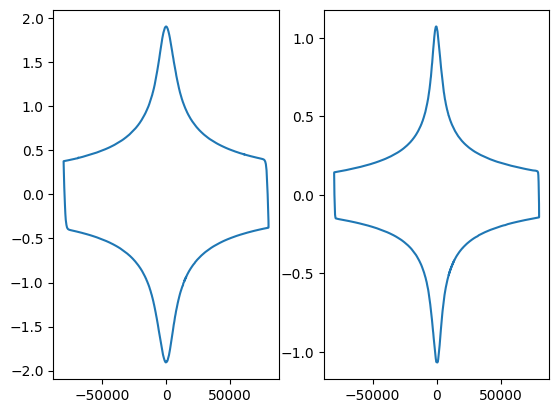

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_storage(file_name):
    with open(file_name, mode='r', errors='ignore') as file:
        string = file.readlines()
    string = string[string.index('[Data]\n')+1:]

    names = ['Temperature (K)', 'Magnetic Field (Oe)', 'Moment (emu)']
    indexes = [2, 3, 4]
    storage_dict = {val: [] for val in names}

    for line in string[1:]:
        line = line.strip().split(',')
        buffer = [line[i] for i in indexes]
        if '' not in buffer:
            for i, value in enumerate(buffer):    
                storage_dict[names[i]].append(np.float64(value))

    storage_df = pd.DataFrame(storage_dict, columns=['Temperature (K)', 'Magnetic Field (Oe)', 'Moment (emu)'])
    return storage_df

storage_df = create_storage('5 OUT-OF-PLANE 5K 8T.DAT')
storage_df_5 = pd.concat([storage_df[90:2002], storage_df[2005:2100]], ignore_index=True)

storage_df = create_storage('5 OUT-OF-PLANE 30K 8T.DAT')
storage_df_30 = pd.concat([storage_df[50:1816], storage_df[1820:1900]], ignore_index=True)

plt.subplot(121).plot(storage_df_5['Magnetic Field (Oe)'], storage_df_5['Moment (emu)'])
plt.subplot(122).plot(storage_df_30['Magnetic Field (Oe)'], storage_df_30['Moment (emu)'])

Теперь подпишем каждый из них по параметрам эксперимента

In [4]:
# plt.rc('text', usetex=True)
plt.rcParams.update(plt.rcParamsDefault)
...

Ellipsis

Отредакируйте размер шрифтов для удобного чтения названий

Перейдём к осям: создадим подпись к оси **x**, увеличим шрифт чисел и их тиков

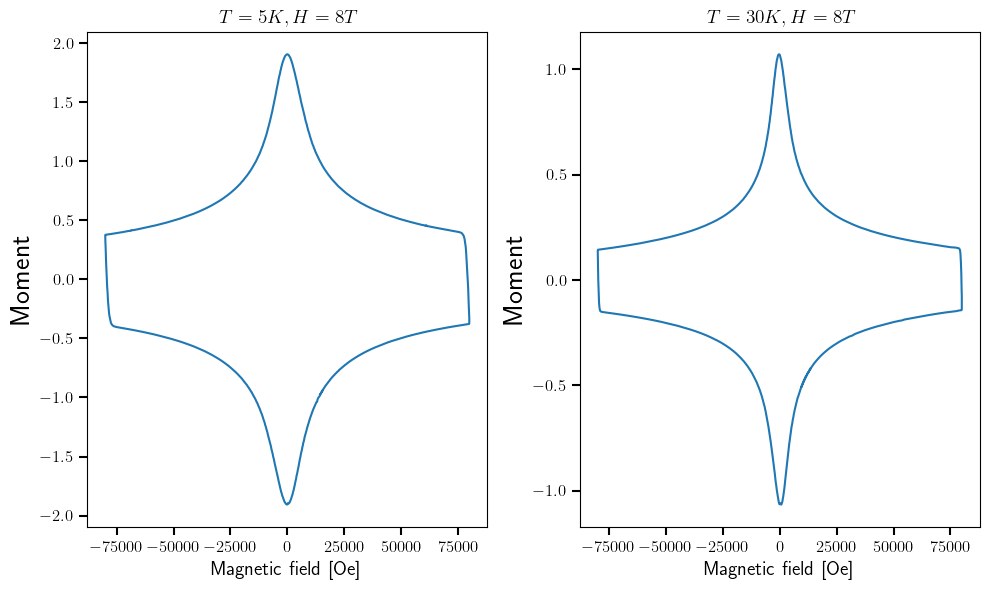

In [ ]:
fig = plt.figure(1, figsize=(10, 6))
plt.rcParams.update(plt.rcParamsDefault)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title(r'$T = 5K, H = 8T$', fontsize=14)
ax2.set_title(r'$T = 30K, H = 8T$', fontsize=14)

ax1.plot(storage_df_5['Magnetic Field (Oe)'], storage_df_5['Moment (emu)'])
ax2.plot(storage_df_30['Magnetic Field (Oe)'], storage_df_30['Moment (emu)'])

for ax in [ax1, ax2]:
    ax.set_xlabel('Magnetic field [Oe]', fontsize=14)
    ax.set_ylabel('Moment', fontsize=20)
    ax.tick_params(axis="both", which='major', 
                   labelsize=12, width=1.5, length=6)
    
plt.tight_layout()

_Упражнение 9.5_

Выберем один из графиков прошлого задания и отметим на нём маркеры каждой второй точки построения

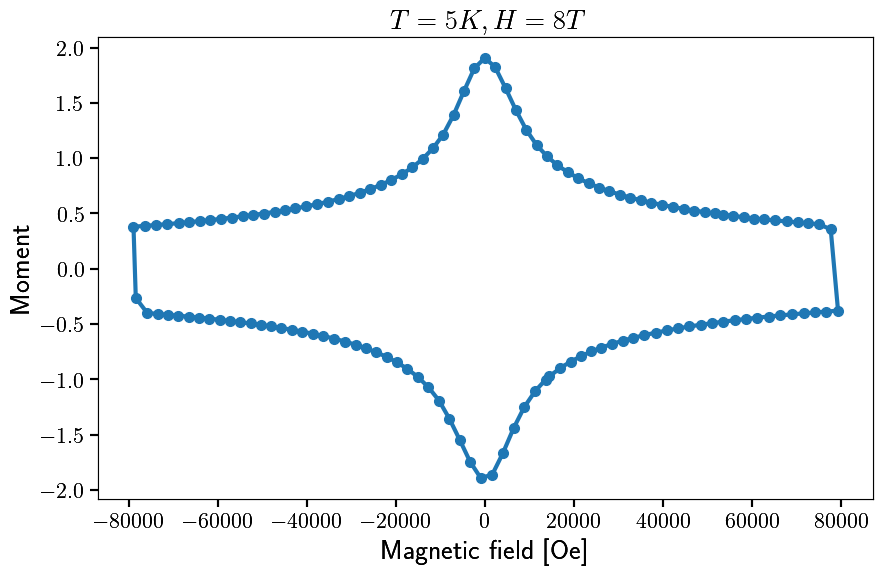

In [ ]:
fig = plt.figure(1, figsize=(10, 6))
plt.rcParams.update(plt.rcParamsDefault)

ax = fig.add_subplot(111)

ax.set_title(r'$T = 5K, H = 8T$', fontsize=20)

ax.plot(storage_df_5['Magnetic Field (Oe)'][::15], storage_df_5['Moment (emu)'][::15], 
        'o', linestyle='-', linewidth=3, markersize=7)
ax.set_xlabel('Magnetic field [Oe]', fontsize=20)
ax.set_ylabel('Moment', fontsize=20)
ax.tick_params(axis="both", which='major', 
                labelsize=16, width=1.5, length=6)
plt.show()

Подгоните размеры шрифтов, линий, маркеров под новый размер графика

Добавьте верните вторую линию на график.
Разделите маркеры по форме или цвету - сделайте их различающимися по как минимум двум параметрам, причём создание всех линий должно производиться в цикле с телом из одной функции
Добавьте легенду

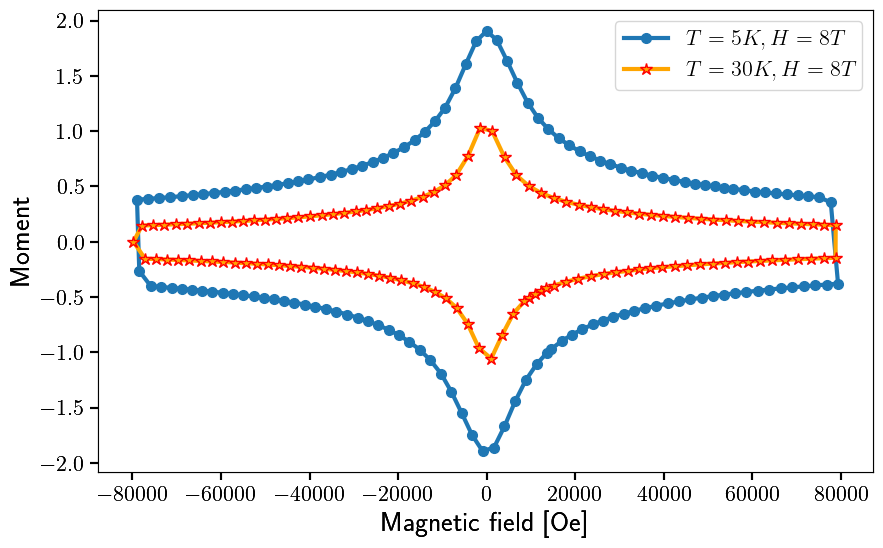

In [ ]:
fig = plt.figure(1, figsize=(10, 6))
plt.rcParams.update(plt.rcParamsDefault)

ax = fig.add_subplot(111)

ax.plot(storage_df_5['Magnetic Field (Oe)'][::15], storage_df_5['Moment (emu)'][::15], 
        'o', linestyle='-', linewidth=3, markersize=7, label=r'$T = 5K, H = 8T$')
ax.plot(storage_df_30['Magnetic Field (Oe)'][::15], storage_df_30['Moment (emu)'][::15], '*', color='orange',
        linestyle='-', linewidth=3, markeredgecolor='red', markersize=9, label=r'$T = 30K, H = 8T$')
ax.set_xlabel('Magnetic field [Oe]', fontsize=20)
ax.set_ylabel('Moment', fontsize=20)
ax.tick_params(axis="both", which='major', 
                labelsize=16, width=1.5, length=6)
ax.legend(fontsize=16)
plt.show()

_Упражнение 9.6_

Теперь займёмся погрешностями. Для построения погрешностей, нам не хватает расчёта отклонений в каждой точке или хотя бы в их части. Создадим массив отклонений на некоторый фиксированный процент, то есть создаём массив абсолютных отклонений каждой точки от идеального значения с заданной относительной погрешностью. 

Для проверки, постройте получившийся массив погрешности

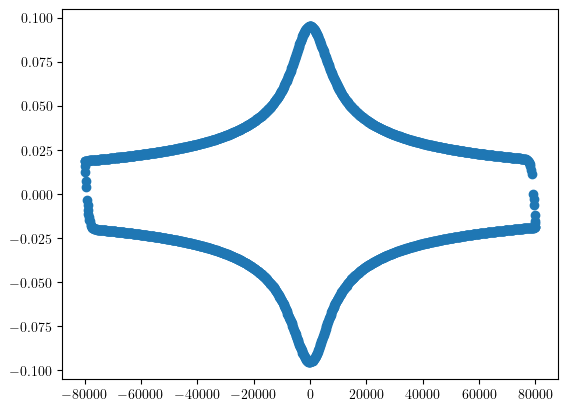

In [21]:
y_err = storage_df_5['Moment (emu)']*0.05

plt.scatter(storage_df_5['Magnetic Field (Oe)'], y_err)
plt.show()

Совместим получившиеся значения на графике с погрешностями. Настройте отображение

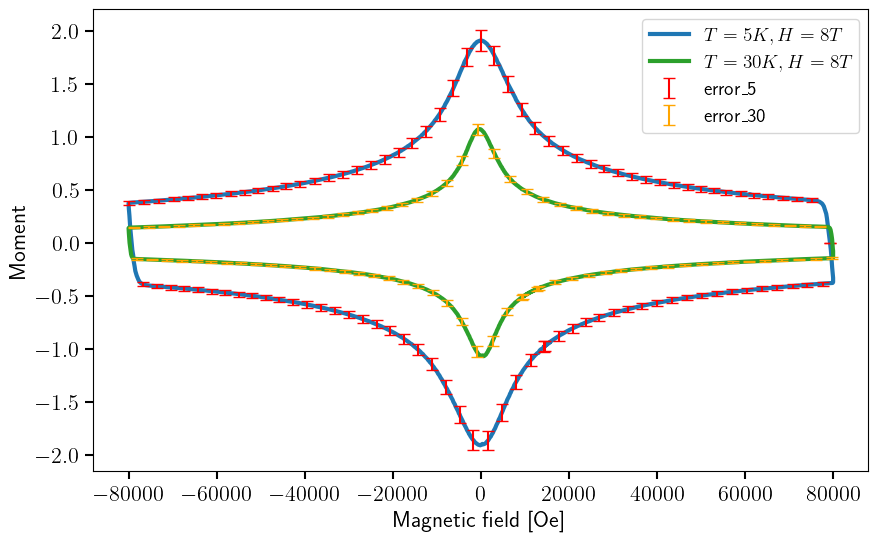

In [ ]:
plt.figure(figsize=(10, 6))
plt.rcParams.update(plt.rcParamsDefault)
y_err_5 = storage_df_5['Moment (emu)']*0.05
y_err_30 = storage_df_30['Moment (emu)']*0.05

plt.plot(storage_df_5['Magnetic Field (Oe)'], storage_df_5['Moment (emu)'], 
         linewidth=3, label=r'$T = 5K, H = 8T$')
plt.errorbar(storage_df_5['Magnetic Field (Oe)'], storage_df_5['Moment (emu)'], 
             np.abs(y_err_5), capsize=4, errorevery=20, linestyle='', ecolor='r',
             marker='', ms=5, mfc='none', mec='r', label='error_5')
plt.plot(storage_df_30['Magnetic Field (Oe)'], storage_df_30['Moment (emu)'], 
         linewidth=3, label=r'$T = 30K, H = 8T$')
plt.errorbar(storage_df_30['Magnetic Field (Oe)'], storage_df_30['Moment (emu)'], 
             np.abs(y_err_30), capsize=4, errorevery=20, linestyle='', ecolor='orange',
             marker='', ms=5, mfc='none', mec='orange', label='error_30')

plt.xlabel('Magnetic field [Oe]', fontsize=16)
plt.ylabel('Moment', fontsize=16)
plt.tick_params(axis="both", which='major', 
                labelsize=16, width=1.5, length=6)
plt.legend(fontsize=14)
plt.show()

_Упражнение 9.7_

Создадим трёхмерный график. Напишите двумерную сетку, на основе которой сгенерируйте некоторую поверхность, которую отобразите на графике

Измените цветовую схему и добавьте подписи

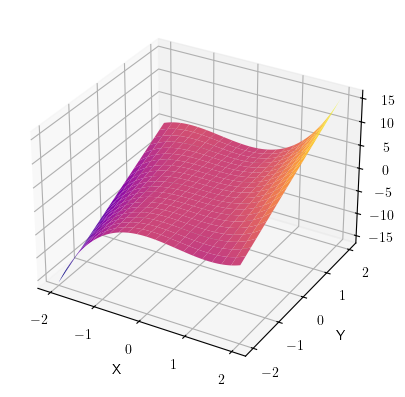

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

L, n = 2, 400
x = np.linspace(-L, L, n)
y = x.copy()
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
Z = (X + Y) * X**2
ax.plot_surface(X, Y, Z, rstride=20, cstride=20, cmap=cm.plasma)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**Задание 4.2** Имеется набор данных `MeasureData`, полученных в ходе некоторого эксперимента. Требуется визуализировать их и отметить погрешности, соответствующие максимальному отклонению при выбранных значений температуры

Добавьте оформление графика

In [14]:
import random

# Генерация данных
Temp = []
Res = []
[Temp.extend([T]*8) for T in range(300, 10, -10)]
Res = [100*(1+0.03*(300-T))*(1-random.random()*0.03) for T in Temp]

# Словарь, с которым вам предстит работать
MeasureData = {'Temperature': Temp,
               'Resistence': Res}
...

Ellipsis